## US01 - Introduction to Machine Learning ##

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import tree

In [11]:
data = pd.read_csv('UTSEUS-anjuke-real-estate-baoshan.csv')

In [12]:
X = data[['longitude', 'latitude', 'bedroom', 'room', 'surface']]
Y = data['onesquaremeter']

In [13]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [14]:
X

array([[0.25752705, 0.25162597, 0.125     , 0.22222222, 0.01626016],
       [0.47458315, 0.19618233, 0.        , 0.11111111, 0.02276423],
       [0.44090217, 0.15866316, 0.25      , 0.22222222, 0.06666667],
       ...,
       [0.57659544, 0.31875486, 0.        , 0.22222222, 0.01219512],
       [0.57659544, 0.31875486, 0.125     , 0.22222222, 0.04065041],
       [0.44214924, 0.49698795, 0.125     , 0.22222222, 0.06747967]])

In [15]:
Z = pd.DataFrame.copy(Y)
Z[Y <= np.quantile(Y,0.25)] = 0
Z[(Y > np.quantile(Y,0.25)) & (Y <= np.quantile(Y,0.5))] = 1
Z[(Y > np.quantile(Y,0.5)) & (Y <= np.quantile(Y,0.75))] = 2
Z[Y > np.quantile(Y,0.75)] = 3

In [16]:
Z

0        0.0
1        2.0
2        3.0
3        3.0
4        2.0
5        2.0
6        0.0
7        3.0
8        1.0
9        3.0
10       2.0
11       3.0
12       0.0
13       0.0
14       3.0
15       3.0
16       3.0
17       3.0
18       1.0
19       3.0
20       3.0
21       3.0
22       3.0
23       2.0
24       1.0
25       2.0
26       1.0
27       3.0
28       2.0
29       1.0
        ... 
34386    3.0
34387    2.0
34388    0.0
34389    1.0
34390    2.0
34391    2.0
34392    3.0
34393    2.0
34394    2.0
34395    2.0
34396    2.0
34397    3.0
34398    3.0
34399    2.0
34400    2.0
34401    0.0
34402    2.0
34403    3.0
34404    3.0
34405    2.0
34406    2.0
34407    2.0
34408    3.0
34409    0.0
34410    0.0
34411    0.0
34412    1.0
34413    0.0
34414    1.0
34415    2.0
Name: onesquaremeter, Length: 34416, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.33, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
t = time.time()
param_grid = {'C': [0.1, 1, 10, 100]}
search = GridSearchCV(LinearSVC(), param_grid, cv=5)
search.fit(X_train, Z_train)
time.time()-t

C:\Users\jeane\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeane\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeane\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeane\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeane\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

97.73306107521057

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
t = time.time()
param_grid = {'n_estimators': [100, 200, 300, 500]}
clf = AdaBoostClassifier()
search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X_train, Z_train)
time.time()-t

104.90597820281982

In [20]:
search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [21]:
search.best_score_

0.6116315378610461

In [22]:
clf = AdaBoostClassifier(n_estimators=500)
clf.fit(X_train, Z_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [23]:
Z_pred = clf.predict(X_test)

In [24]:
Z_test

32876    0.0
6072     2.0
17935    3.0
1513     3.0
10389    3.0
7524     2.0
3922     3.0
16495    0.0
28908    3.0
20405    1.0
28382    1.0
33125    0.0
22537    3.0
5327     2.0
18238    1.0
18085    2.0
12555    0.0
3397     3.0
5282     1.0
34106    0.0
13328    0.0
10949    2.0
200      3.0
18360    1.0
19283    2.0
2071     3.0
27031    2.0
21989    1.0
13399    0.0
2133     3.0
        ... 
16215    0.0
23134    2.0
21286    2.0
3302     2.0
18362    2.0
4465     2.0
23920    2.0
27311    2.0
3974     2.0
31842    1.0
18417    3.0
9520     3.0
25877    2.0
17512    0.0
1775     3.0
25608    0.0
32041    0.0
5508     3.0
19573    0.0
30695    1.0
3877     3.0
5493     2.0
17291    0.0
10193    3.0
32086    0.0
21353    2.0
24479    3.0
57       1.0
34053    0.0
23663    0.0
Name: onesquaremeter, Length: 11358, dtype: float64

In [25]:
ZZ = Z_test.to_numpy()

In [26]:
ZZ

array([0., 2., 3., ..., 1., 0., 0.])

In [27]:
np.mean(Z_pred == Z_test)

0.6183306920232435

In [28]:
conf_matrix = np.zeros((4,4))
for k in range(len(Z_pred)):
    conf_matrix[int(Z_pred[k]), int(ZZ[k])]+=1
conf_matrix

array([[2020.,  435.,  260.,  168.],
       [ 528., 1638.,  635.,   96.],
       [ 229.,  600., 1443.,  632.],
       [  50.,  174.,  528., 1922.]])

In [29]:
conf_matrix[3,0]/np.sum(conf_matrix[3,:])

0.018698578908002993

In [30]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
clf = LinearSVC()
# scores = cross_val_score(clf, X_train, Z_train, cv=5)
t = time.time()
clf.fit(X_train, Z_train)
time.time()-t

0.9167752265930176

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.5857059848925044

[Text(167.4, 181.2, 'X[1] <= 0.345\nentropy = 0.75\nsamples = 34416\nvalue = [8638, 8602, 8574, 8602]'),
 Text(83.7, 108.72, 'X[1] <= 0.164\nentropy = 0.655\nsamples = 16401\nvalue = [861, 2636, 5484, 7420]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.373\nsamples = 3191\nvalue = [221, 138, 343, 2489]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.671\nsamples = 13210\nvalue = [640, 2498, 5141, 4931]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.552\nentropy = 0.67\nsamples = 18015\nvalue = [7777, 5966, 3090, 1182]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.696\nsamples = 13968\nvalue = [4205, 5590, 3002, 1171]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.212\nsamples = 4047\nvalue = [3572, 376, 88, 11]')]

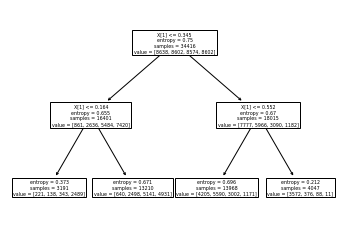

In [34]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,Z)
tree.plot_tree(clf.fit(X,Z))

In [1]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 4, 6, 8, 10, 20, 40], 'criterion': ['gini', 'entropy']}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=ShuffleSplit(n_splits=5))
search.fit(X, Z)

NameError: name 'tree' is not defined

In [36]:
search.best_estimator_
search.best_params_

{'criterion': 'gini', 'max_depth': 20}

In [37]:
clf = tree.DecisionTreeClassifier(max_depth=20)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.7560720511330622

In [38]:
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X,Z)

In [39]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

from sklearn import svm
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
search = GridSearchCV(svm.SVC(), param_grid, cv=ShuffleSplit(n_splits=5))
search.fit(X, Z)
search.best_estimator_
search.best_score_

0.5350958744915747